## DNN Feed Forward Using Numpy And Tensorflow

#### Author: Srini Ananthakrishnan
#### Date: 04/21/2017

### Import Packages

In [1]:
import numpy as np
import tensorflow as tf
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ONLY enable this flag when using smaller size data
DEBUG = False

### Prepare Data (synthetic)

In [3]:
def complicated_function(x):
    return np.cos(1. / (np.abs(x) + .75))

In [4]:
def polynomial_matrix(x, p):
    """generate polynomial matrix with degree-0     
    Args:
        p: 
    Returns:
        matrix with columns for next set of powers
    """
    x = x.reshape(x.shape[0], 1)
    #matrix = np.ones((x.shape[0], 1))  # degree-0
    matrix = x
    #for power in range(1, p + 1):
    for power in range(1, p):
        # stack new column for next set of powers
        matrix = np.hstack((matrix, matrix[:, -1:] * x))
    return matrix

#### Generate Data(V1)

In [5]:
def generateDataV1(N, M):

    # Generate synthetic data and label
    np.random.seed(seed=1234)
    
    # features (observables)
    f = np.random.normal(size=(N,M)) * 2

    # coefficients (latent)
    c = np.random.normal(size=(M,1)) 

    # draw labels
    X = f.dot(c).reshape(N,)
    Y = complicated_function(X).astype(np.float32)

    print("Truth data shape:", "X:", f.shape, "Y:", Y.shape)
    plt.plot(X, Y, '.')
    plt.show()
    # cross validation: test/train split
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(f, Y, test_size=0.2, random_state=42)

    # feature normalization
    stdnorm = StandardScaler()
    stdnorm.fit(X_train)
    X_train = stdnorm.transform(X_train)
    X_test = stdnorm.transform(X_test)

    print("Train/Test split:", "X_train:", X_train.shape, "Y_train:", Y_train.shape,
          "X_test:", X_test.shape, "Y_test:", Y_test.shape)

    return f, Y, X_train, X_test, Y_train, Y_test

#### GenerateData(V2)

In [6]:
def generateDataV2(N, power, add_noise=True, add_cosine=False):
    """Function generates synthetic data
    Args:
        N: number of input rows
        power: number of input columns or features
        add_noise: adds random noise to output Y
        add_cosine: transforms Y to element wise consine 
    Returns:    
        X: input features of shape (N,)
        Y: output of shape (N,)
        X_train: X matrix training data 
        X_test: X matrix test data
        Y_train: Y matrix training data
        Y_test: Y matrix test data
    """

    # Generate synthetic data and label
    np.random.seed(seed=1234)

    # Generate samples for X
    X = np.random.normal(size=N)

    # Generate samples for Y
    #true_coeff = np.random.normal(size=power + 1)
    true_coeff = np.random.normal(size=power)

    if (add_cosine):
        X_cosine = complicated_function(X).astype(np.float32)
        Y = np.dot(polynomial_matrix(X_cosine, power), true_coeff)
    else:
        Y = np.dot(polynomial_matrix(X, power), true_coeff)
    Y_observe = Y

    # Add noise to make observations
    if (add_noise):
        Y_observe = Y + np.random.normal(size=N) * 2

    # reshape into matrix form
    Y_mat = Y_observe.reshape(Y_observe.shape[0], 1)
    X_mat = polynomial_matrix(X, power)

    print("Truth data shape:", "X:", X.shape, "Y:", Y.shape)

    # cross validation: test/train split
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X_mat, Y_mat, test_size=0.2, random_state=42)

    # feature normalization
    stdnorm = StandardScaler()
    stdnorm.fit(X_train)
    X_train = stdnorm.transform(X_train)
    X_test = stdnorm.transform(X_test)

    print("Train/Test split:", "X_train:", X_train.shape, "Y_train:", Y_train.shape,
          "X_test:", X_test.shape, "Y_test:", Y_test.shape)

    return X, Y, X_train, X_test, Y_train, Y_test

### Load Boston Housing Data

In [7]:
def loadBostonData():
    boston = load_boston()
    print("boston data shape:",boston.data.shape)
    print("boston target shape:",boston.target.shape)

    # cross validation: test/train split
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(boston.data, boston.target, 
                                                                         test_size=0.2, random_state=42)

    #feature normalization
    stdnorm = StandardScaler()
    stdnorm.fit(X_train)
    X_train = stdnorm.transform(X_train)
    X_test = stdnorm.transform(X_test)
    
    print("Train/Test split:", "X_train:", X_train.shape, "Y_train:", Y_train.shape,
          "X_test:", X_test.shape, "Y_test:", Y_test.shape)

    return boston.data, boston.target, X_train, X_test, Y_train, Y_test

### Hyper Parameters

#### Please have comment unused Model

### Model-1

Truth data shape: X: (10000, 4) Y: (10000,)


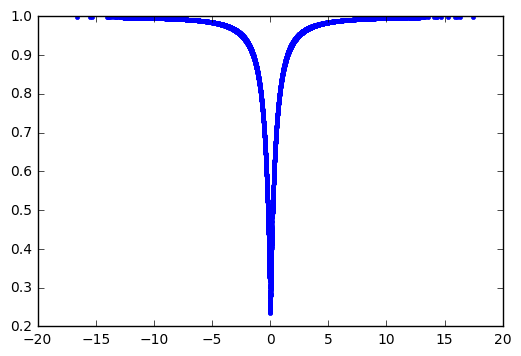

Train/Test split: X_train: (8000, 4) Y_train: (8000,) X_test: (2000, 4) Y_test: (2000,)


In [8]:
# Hyperparameters
N = 10000 # length of input data (rows)
M = 4 # number of features (cols)
epochs = 40000 # training iterations
batch_size = 1000 # batch size per training iteration
learning_rate = 0.001 # learning rate for optimizer
nodes_per_layer = [M, M*2, M*2, 1] # DNN architecture. Input, Hidden-Layer1, Hidden-Layer2, Output

# Generate Data with complex cosine
X, Y, X_train, X_test, Y_train, Y_test = generateDataV1(N, M)

# Assign and Reshape
f = X_train # f is input feature
y = Y_train.reshape(Y_train.shape[0],) # y is target output
f_test = X_test # f_test is input test feature
y_test = Y_test.reshape(Y_test.shape[0],) # y_test is target test output

### Model-2 (Using synthetic data with multiple powers)

In [9]:
# # Hyperparameters
# N = 10000 # length of input data (rows)
# M = 4 # number of features (cols)
# epochs = 40000 # training iterations
# batch_size = 100 # batch size per training iteration
# learning_rate = 0.001 # learning rate for optimizer
# nodes_per_layer = [M, M*2, M*2, 1] # DNN architecture. Input, Hidden-Layer1, Hidden-Layer2, Output

# # Generate Data with complex cosine
# X, Y, X_train, X_test, Y_train, Y_test = generateDataV2(N, M)

# # Assign and Reshape
# f = X_train # f is input feature
# y = Y_train.reshape(Y_train.shape[0],) # y is target output
# f_test = X_test # f_test is input test feature
# y_test = Y_test.reshape(Y_test.shape[0],) # y_test is target test output

### Model-3 (Using Boston Housing Data)

In [10]:
# # Load Boston Data
# X, Y, X_train, X_test, Y_train, Y_test = loadBostonData()

# # Hyperparameters
# N = X.shape[0] # length of input data (rows)
# M = X.shape[1] # number of features (cols)
# epochs = 40000 # training iterations
# batch_size = 22 # batch size per training iteration
# learning_rate = 0.01 # learning rate for optimizer
# nodes_per_layer = [M, M*2, M*2, 1] # DNN architecture. Input, Hidden-Layer1, Hidden-Layer2, Output

# # Assign and Reshape
# f = X_train # f is input feature
# y = Y_train # y is target output
# f_test = X_test # f_test is input test feature
# y_test = Y_test # y_test is target test output

### Truth relationship

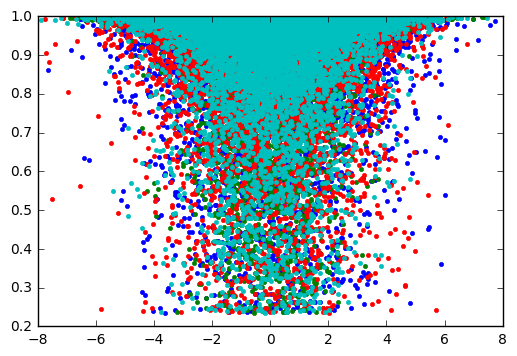

In [11]:
plt.plot(X, Y, '.')
plt.show()

### Numpy implementation of DNN (not including optimization)

In [12]:
if DEBUG == True:
    input_features = f.T
    print("nodes_per_layer",nodes_per_layer)
    layer_matrices = [None, ] * len(nodes_per_layer)
    layer_biases = [None, ] * len(nodes_per_layer)
    print("layer_matrices:\n",layer_matrices)
    print("layer_biases:\n",layer_biases)
    print("\nf shape:",f.shape)
    print("f:\n",f[:3])
    print("\ninput_features f.transpose() shape:",input_features.shape)
    print("input_features:\n",input_features[:3])
    for layer in range(len(nodes_per_layer) - 1):
        print("\nlayer:",layer)
        input_size = nodes_per_layer[layer]
        output_size = nodes_per_layer[layer + 1]
        print("layer_matrices[%d] (Weights) of size %d x %d (output x input)" % (layer, output_size, input_size))
        layer_matrices[layer] = np.random.normal(size=(output_size,input_size))
        print("layer_matrices[%d]:"%layer,"shape:",layer_matrices[layer].shape,"\n",layer_matrices[layer][:3])
        layer_biases[layer] = np.random.normal(size=(output_size,1))
        print("layer_biases[%d]:"%layer,"shape:",layer_biases[layer].shape,"\n",layer_biases[layer][:3])

In [13]:
if DEBUG == True:
    print("input_features shape:",input_features.shape)
    print("input_features:\n",input_features[:3])
    intermediate_outputs = [None, ] * (len(nodes_per_layer) - 1)
    for layer in range(len(nodes_per_layer) - 1):
        print("\nlayer:",layer)
        if layer == 0:
            print(layer_matrices[layer].shape, input_features.shape)
            #tmp = tf.matmul(layer_matrices[layer], input_features)
            tmp = np.dot(layer_matrices[layer], input_features)
            print("tmp:",tmp.shape,"\n",tmp[:3])
            #matmul = tf.add(tmp,layer_biases[layer])
            matmul = tmp+layer_biases[layer]
            print("matmul=(layer_matrices[%d]*input_features) + bias[%d]\n"%(layer,layer),matmul[:3])
        else:
            print(layer_matrices[layer].shape, intermediate_outputs[layer - 1].shape)
            #tmp = tf.matmul(layer_matrices[layer], intermediate_outputs[layer - 1])
            tmp = np.dot(layer_matrices[layer], intermediate_outputs[layer - 1])
            print("tmp:",tmp.shape,"\n",tmp[:3])
            #matmul = tf.add(tmp,layer_biases[layer])
            matmul = tmp+layer_biases[layer]
            print("matmul=(layer_matrices[%d]*intermediate_outputs[%d]) + bias[%d]"%(layer,layer-1,layer),matmul.shape,"\n",matmul[:3])

        if layer < len(nodes_per_layer) - 2:
            #intermediate_outputs[layer] = tf.nn.relu(matmul)
            intermediate_outputs[layer] = np.maximum(matmul, 0)
            print("intermediate_outputs[%d]=tf.tanh(matmul) shape:"%layer,intermediate_outputs[layer].shape,"\n",intermediate_outputs[layer][:3])
        else:
            intermediate_outputs[layer] = matmul
            print("intermediate_outputs[%d]=matmul"%layer,intermediate_outputs[layer].shape,"\n",intermediate_outputs[layer][:3])

    output=intermediate_outputs[-1]
    print("\noutput=intermediate_outputs[-1] shape:",output.shape,"\n",output[:3])
    print("\nf shape:",f.shape,"\n",f[:3])
    print("\ny shape:",y.shape,"\n",y[:3])
    error = output - y
    print("\nerror (output - y) shape:",error.shape,"\n",error[:3])
    #self.cost = tf.matmul(error, tf.transpose(error))
    cost = np.dot(error, error.T)
    print("\ncost:",cost[0][0])


### Basic DNN routine (Numpy and Tensorflow)

In [14]:
def basic_dnn(f,y,epochs,learning_rate,use_tf=False):
    costs = []
    for epoch in range(epochs):
        if (use_tf):
            input_features = tf.placeholder(tf.float64)
            target_output = tf.placeholder(tf.float64)
        else:
            input_features = f.T
            target_output = y
        if epoch == 0:
            layer_matrices = [None, ] * len(nodes_per_layer)
            layer_biases = [None, ] * len(nodes_per_layer)
        for layer in range(len(nodes_per_layer) - 1):
            input_size = nodes_per_layer[layer]
            output_size = nodes_per_layer[layer + 1]
            if (use_tf):
                layer_matrices[layer] = tf.Variable(tf.random_normal([output_size, input_size], dtype=tf.float64))
                layer_biases[layer] = tf.Variable(tf.random_normal([output_size, 1], dtype=tf.float64))
            else:
                layer_matrices[layer] = np.random.normal(size=(output_size,input_size))
                layer_biases[layer] = np.random.normal(size=(output_size,1))  
                # add cost optimization here and update layer_matrices

        if epoch == 0:
            intermediate_outputs = [None, ] * (len(nodes_per_layer) - 1)
        for layer in range(len(nodes_per_layer) - 1):
            if layer == 0:
                if (use_tf):
                    matmul = tf.add(tf.matmul(layer_matrices[layer], 
                                              input_features), layer_biases[layer])
                else:
                    tmp = np.dot(layer_matrices[layer], input_features)
                    matmul = tmp+layer_biases[layer]
            else:
                if (use_tf):
                    matmul = tf.add(tf.matmul(layer_matrices[layer], intermediate_outputs[layer - 1]), layer_biases[layer])
                else:
                    tmp = np.dot(layer_matrices[layer], intermediate_outputs[layer - 1])
                    matmul = tmp+layer_biases[layer]
            
            # apply activation
            if layer < len(nodes_per_layer) - 2:
                if (use_tf):
                    intermediate_outputs[layer] = tf.nn.relu(matmul)
                else:
                    intermediate_outputs[layer] = np.maximum(matmul, 0)
            else:
                intermediate_outputs[layer] = matmul
            

        output=intermediate_outputs[-1]
        if (use_tf):
            error = output - target_output
            cost = 0.5*tf.matmul(error, tf.transpose(error))
        else:
            error = output - target_output[0]
            cost = np.dot(error, error.T)
            
        if (not use_tf):
            if(not epoch % epochs/20):
                print ("Epoch:", (epoch+1), "cost =", "{:.5f}".format(cost[0][0]))
            costs.append(cost[0][0])
        
        if (use_tf):
            opt = tf.train.AdamOptimizer(learning_rate)
            train_step = opt.minimize(cost)
            return cost, train_step, output, input_features, target_output
    return costs, output

### Train routine for Tensorflow

In [15]:
def train(cost, train_step, epochs, batch_size, f, y, f_test, y_test, output, input_features, target_output):
    print(input_features, target_output)
    costs = np.zeros(epochs)
    model = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(model)
        for epoch in range(epochs):
            indices = np.random.randint(len(f), size=batch_size)
            _f = f[indices, :]
            _y = y[indices]
            _, costs[epoch] = sess.run([train_step, cost,], feed_dict={input_features: _f.transpose(), target_output: _y})
            if(not epoch % 1000):
                print ("Epoch:", (epoch+1), "cost =", "{:.5f}".format(costs[epoch]))
        
        print("run validation on train set...")
        est_y = np.zeros(y.shape[0])
        for idx, _f in enumerate(f):
            est_y[idx] = sess.run([output], feed_dict={input_features: _f.reshape(-1,1)})[0]

        print("run validation on test set...")
        est_y_test = np.zeros(y_test.shape[0])
        for idx, _f_test in enumerate(f_test):
            est_y_test[idx] = sess.run([output], feed_dict={input_features: _f_test.reshape(-1,1)})[0]

    return costs, est_y, est_y_test

### Execute DNN Numpy way (debug purpose)

In [16]:
# Using Numpy (cost optimization not included)
#costs, est_y = basic_dnn(f,y,epochs,learning_rate,use_tf=False)

In [17]:
# plt.plot(range(epochs), np.log10(costs))
# plt.show()

In [18]:
# plt.plot(y, est_y[0], '.')
# plt.show()

### Execute DNN Tensorflow way

In [19]:
# Using TensorFlow
tf.reset_default_graph()
# set epochs param to 1. train function will run epochs for tensorflow
cost, train_step, output, input_features, target_output = basic_dnn(f,y,1,learning_rate,use_tf=True)
costs, est_y, est_y_test = train(cost, train_step, epochs, batch_size, f, y, 
                                 f_test, y_test, output, input_features, target_output)

Tensor("Placeholder:0", dtype=float64) Tensor("Placeholder_1:0", dtype=float64)
Epoch: 1 cost = 53258.40111
Epoch: 1001 cost = 460.34482
Epoch: 2001 cost = 107.97887
Epoch: 3001 cost = 47.49550
Epoch: 4001 cost = 21.68662
Epoch: 5001 cost = 11.22011
Epoch: 6001 cost = 7.93425
Epoch: 7001 cost = 5.64114
Epoch: 8001 cost = 4.80517
Epoch: 9001 cost = 2.38998
Epoch: 10001 cost = 1.42945
Epoch: 11001 cost = 0.66820
Epoch: 12001 cost = 0.77247
Epoch: 13001 cost = 0.53011
Epoch: 14001 cost = 0.38425
Epoch: 15001 cost = 0.25369
Epoch: 16001 cost = 0.09625
Epoch: 17001 cost = 0.07172
Epoch: 18001 cost = 0.06121
Epoch: 19001 cost = 0.05666
Epoch: 20001 cost = 0.05069
Epoch: 21001 cost = 0.04865
Epoch: 22001 cost = 0.05976
Epoch: 23001 cost = 0.04377
Epoch: 24001 cost = 0.02462
Epoch: 25001 cost = 0.01919
Epoch: 26001 cost = 0.01675
Epoch: 27001 cost = 0.01478
Epoch: 28001 cost = 0.01392
Epoch: 29001 cost = 0.01570
Epoch: 30001 cost = 0.01636
Epoch: 31001 cost = 0.01600
Epoch: 32001 cost = 0.0147

### Cost (loss function) plot

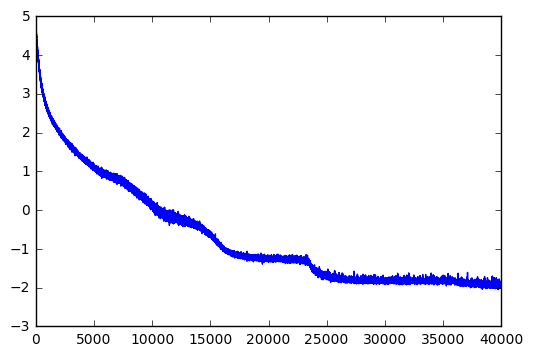

In [20]:
plt.plot(range(epochs), np.log10(costs))
plt.show()

### y vs y-estimated (y_hat)

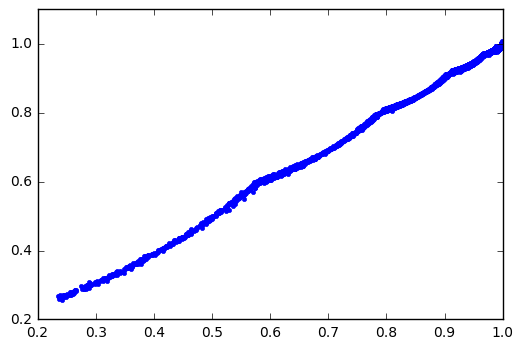

In [21]:
plt.plot(y, est_y, '.')
plt.show()

### y_test vs y_test-estimated

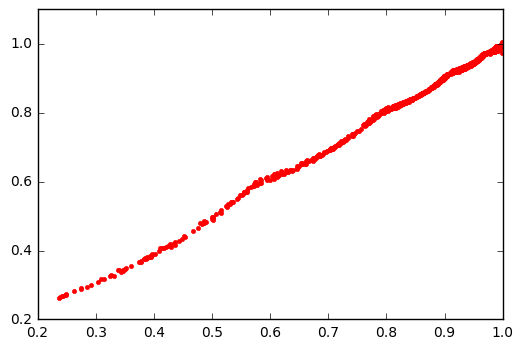

In [22]:
plt.plot(y_test, est_y_test, 'r.')
plt.show()

### Dump few target values

In [23]:
print(y[:5])
print(est_y[:5])

[ 0.43692502  0.92154789  0.98846841  0.99595129  0.88268137]
[ 0.42926909  0.92070748  0.99049183  0.99361411  0.87765589]


In [24]:
print(y_test[:5])
print(est_y_test[:5])

[ 0.97753567  0.70309013  0.97447079  0.96657014  0.88810825]
[ 0.97488393  0.69353856  0.97421498  0.97014796  0.88850532]
